In [10]:
import torch
import torch.nn
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.optim as optim

In [11]:
X, y = make_blobs(n_samples=1200, centers=4, n_features=8,random_state=0,cluster_std = 8)

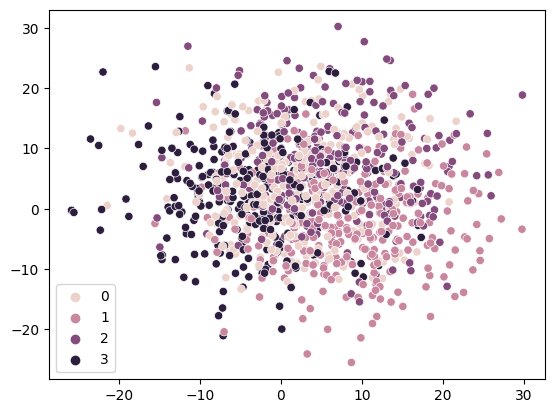

In [12]:
sns.scatterplot(x = X[:,5],y = X[:,1], hue = y);

In [13]:
y_cat = torch.from_numpy(y)
y_cat = torch.nn.functional.one_hot(y_cat).to(torch.float32)
y_cat

tensor([[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.]])

In [31]:
X_train

array([[ -2.763258  ,  -2.57743975,   8.92810106, ...,  12.51577167,
          2.40096851,   4.97482776],
       [ 17.82810696,  -5.17619701,  -2.72131612, ...,  12.57137521,
        -25.88860332,  -5.78923201],
       [-12.69419845,  14.69754233, -13.01715252, ...,  12.76389973,
        -14.44688885,  -6.31572827],
       ...,
       [ -3.3407508 ,   1.88761696,   7.11439306, ...,  14.80310847,
          2.76487318,  -3.81755011],
       [  5.29725429,  22.62752389,  14.85741007, ...,  -0.30979121,
        -15.88848418,   2.26877906],
       [ 21.46342479,  -2.78941922,  -5.75323414, ...,  13.8427691 ,
         -1.97027317,  -8.71946647]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

In [15]:
scaler = StandardScaler()
X_train_scaled = torch.from_numpy(scaler.fit_transform(X_train)).to(torch.float32)
X_test_scaled = torch.from_numpy(scaler.transform(X_test)).to(torch.float32)

In [35]:
scaler = StandardScaler()
X_train_scaled = torch.tensor([scaler.fit_transform(X_train)], dtype= torch.float32)

In [36]:
X_train_scaled

tensor([[[-1.1623,  0.9278,  0.7788,  ...,  0.0893,  0.0554,  0.4120],
         [ 1.5574, -1.5606,  0.5688,  ..., -0.3182,  0.7640, -1.2062],
         [-0.8705, -0.6864,  0.5920,  ...,  1.5717,  0.8953,  1.3574],
         ...,
         [ 3.1047, -0.9336, -0.5058,  ...,  2.4931,  0.2607, -1.1847],
         [ 0.7299,  1.1012, -0.5448,  ..., -0.6448,  0.1174,  2.0587],
         [ 0.0596, -0.1423,  1.3783,  ..., -1.1581, -1.3331, -0.6508]]])

In [16]:
class class_pt(torch.nn.Module):
    def __init__(self, x_dim, y_dim):
        super().__init__()

        self.net = torch.nn.Sequential(
            
            torch.nn.Linear(x_dim, 128),
            torch.nn.ReLU(inplace=True),
            
            torch.nn.Linear(128, 128),
            torch.nn.ReLU(inplace=True),
            
            torch.nn.Linear(128, y_dim),
            torch.nn.ReLU(inplace=True),
        )

    def forward(self, obs):
        return self.net(obs)

In [17]:
x_dim = X.shape[1]
y_dim = y_cat.shape[1]

In [25]:
net = class_pt(x_dim,y_dim)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)

for epoch in range(500):  # loop over the dataset multiple times

    running_loss = 0.0

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(X_train_scaled)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    print(f'[{epoch + 1}, loss: {running_loss}')

print('Finished Training')

[1, loss: 1.3978471755981445
[2, loss: 1.3863171339035034
[3, loss: 1.3746165037155151
[4, loss: 1.3632732629776
[5, loss: 1.352367639541626
[6, loss: 1.341847538948059
[7, loss: 1.3315761089324951
[8, loss: 1.3215409517288208
[9, loss: 1.3116623163223267
[10, loss: 1.301871657371521
[11, loss: 1.2921395301818848
[12, loss: 1.2824957370758057
[13, loss: 1.2729204893112183
[14, loss: 1.2633976936340332
[15, loss: 1.2539353370666504
[16, loss: 1.2444875240325928
[17, loss: 1.235049843788147
[18, loss: 1.2255833148956299
[19, loss: 1.216101884841919
[20, loss: 1.2066092491149902
[21, loss: 1.1971122026443481
[22, loss: 1.1876164674758911
[23, loss: 1.1781224012374878
[24, loss: 1.1686371564865112
[25, loss: 1.1591185331344604
[26, loss: 1.1496039628982544
[27, loss: 1.1399948596954346
[28, loss: 1.1303118467330933
[29, loss: 1.1204274892807007
[30, loss: 1.1102956533432007
[31, loss: 1.0998945236206055
[32, loss: 1.089280128479004
[33, loss: 1.0783541202545166
[34, loss: 1.067144036293029

[327, loss: 0.3552151024341583
[328, loss: 0.354342520236969
[329, loss: 0.35346341133117676
[330, loss: 0.352582722902298
[331, loss: 0.35170280933380127
[332, loss: 0.3508155345916748
[333, loss: 0.34992870688438416
[334, loss: 0.3490496575832367
[335, loss: 0.34815993905067444
[336, loss: 0.3472757339477539
[337, loss: 0.34637489914894104
[338, loss: 0.34548747539520264
[339, loss: 0.34458938241004944
[340, loss: 0.3436949551105499
[341, loss: 0.3427983522415161
[342, loss: 0.3419034779071808
[343, loss: 0.3410130739212036
[344, loss: 0.3401029706001282
[345, loss: 0.3392012119293213
[346, loss: 0.3382916748523712
[347, loss: 0.3373812139034271
[348, loss: 0.33647066354751587
[349, loss: 0.3355554938316345
[350, loss: 0.33464211225509644
[351, loss: 0.33372825384140015
[352, loss: 0.33281198143959045
[353, loss: 0.3318956792354584
[354, loss: 0.3309810757637024
[355, loss: 0.3300629258155823
[356, loss: 0.3291427493095398
[357, loss: 0.3282139301300049
[358, loss: 0.3272850811481476

In [30]:
y_pred = net(X_test_scaled).bool
y_pred

<function Tensor.bool>

In [37]:
class DQN(torch.nn.Module):
    """
    PyTorch implementation of a Deep Q-Network.
    x_dim refers to the number of dimensions to pass as input.
    y_dim refers to the action space of the agent.
    """

    def __init__(self, x_dim, y_dim):
        super().__init__()

        self.net = torch.nn.Sequential(

            torch.nn.Linear(x_dim, 32),
            torch.nn.ReLU(inplace=True),

            torch.nn.Linear(32, 32),
            torch.nn.ReLU(inplace=True),

            torch.nn.Linear(32, 16),
            torch.nn.ReLU(inplace=True),

            torch.nn.Linear(16, y_dim),
            torch.nn.ReLU(inplace=True),
        )

    def forward(self, obs):
        return self.net(obs)


In [44]:
class Agent:
    """
    A learning agent parent class.
    """

    def __init__(self):
        pass

    def set(self):
        """
        Make the agent learn from a (s, a, r, s') tuple.
        """
        raise NotImplementedError

    def get(self):
        """
        Request a next action from the agent.
        """
        raise NotImplementedError
        
class DQNAgent(Agent):
    """
    A basic pytorch Deep Q-learning agent.
    """

    def __init__(self, x_dim, y_dim):
        self.net = DQN(x_dim, y_dim)
        self.opt = torch.optim.Adam(self.net.parameters(), lr=0.0001)

    def set(self, obs_old, act, rwd, obs_new):
        """
        Learn from a single observation sample.
        """
        obs_new = torch.tensor(obs_new)

        # We get the network output
        out = self.net(torch.tensor(obs_new))[act]

        # We compute the target
        with torch.no_grad():
            exp = rwd + CFG.gamma * self.net(obs_new).max()

        # Compute the loss
        loss = torch.square(exp - out)

        # Perform a backward propagation.
        self.opt.zero_grad()
        loss.sum().backward()
        self.opt.step()

In [45]:
agent = DQNAgent(8,4)

In [48]:
import numpy as np

In [56]:
obs_new = torch.tensor([ 0.306629  , -0.03466933,  0.38309968, -0.8690317 , -0.08171916,
        5.21138   ,  1.        ,  1.       ], dtype= torch.float32)

In [61]:
test = agent.net(torch.tensor(obs_new))
test

/tmp/ipykernel_26259/1140569134.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test = agent.net(torch.tensor(obs_new))


tensor([0.3486, 0.1620, 0.2572, 0.0000], grad_fn=<ReluBackward0>)

In [62]:
agent.net(torch.tensor(obs_new))

/tmp/ipykernel_26259/4249558191.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  agent.net(torch.tensor(obs_new))


tensor([0.3486, 0.1620, 0.2572, 0.0000], grad_fn=<ReluBackward0>)

In [63]:
torch.argmax(test).numpy()

array(0)

In [64]:
test.max()

tensor(0.3486, grad_fn=<MaxBackward1>)